In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn.model_selection as ms

Using TensorFlow backend.


In [2]:
movie_data = pd.read_csv('../../data/processed/normalized-movie-data.csv')
trope_data = pd.read_csv('../../data/processed/trope-data.csv')

In [3]:
movie_data = movie_data.sort_values('id')
trope_data = trope_data.sort_values('id')

In [4]:
movie_data.head()

,revenue,class,id,budget,starpower,certification,year,Action,Adventure,Animation,...,Mystery,Romance,Science Fiction,Thriller,War,Western,rating,ratingClass,month1,month2
0,0.761342,8,tt0101272,0.151987,-0.309555,-2.307692e-01,-1.0,0,0,0,...,0,0,0,0,0,0,0.7,6,-0.500000,0.866025
1,0.642307,8,tt0101393,0.800524,0.211361,-6.153846e-01,-1.0,1,0,0,...,1,0,0,1,0,0,0.7,6,0.500000,-0.866025
2,-1.028794,2,tt0101410,-0.700167,0.306794,-6.153846e-01,-1.0,0,0,0,...,0,0,0,0,0,0,0.8,7,-0.866025,-0.500000
3,1.114533,9,tt0101414,0.022942,0.515804,2.220446e-16,-1.0,0,0,1,...,0,1,0,0,0,0,0.8,8,-0.500000,0.866025
4,0.134892,5,tt0101507,-0.930496,-0.137823,-6.153846e-01,-1.0,0,0,0,...,0,0,0,0,0,0,0.8,7,-0.500000,-0.866025


In [5]:
movie_data.columns

Index(['revenue', 'class', 'id', 'budget', 'starpower', 'certification',
       'year', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War',
       'Western', 'rating', 'ratingClass', 'month1', 'month2'],
      dtype='object')

In [6]:
movie_X = movie_data[['budget', 'starpower', 'certification',
       'year', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War',
       'Western', 'month1', 'month2']]
y = movie_data['ratingClass']

In [7]:
new_y = []
for index in range(len(y)):
    new_y.append([0] * 10)
    new_y[-1][y[index]] = 1
new_y = np.array(new_y).reshape(-1, 10)

In [8]:
trope_data.head()

,id,ABNegative,ABirthdayNotABreak,ABloodyMess,ABoyAGirlAndABabyFamily,ABoyAndHisX,ACappella,AChatWithSatan,AChildShallLeadThem,ACupAngst,...,ZombiePukeAttack,Zoom,ptitle27osktao4y3f,ptitle5f8le58t,ptitlei70v550i,ptitleke2fhm29,ptitlel9hiod7i,ptitlews9vjxau4x1j,ptitlex50era43,ptitlezt06x76c
1400,tt0101272,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,tt0101393,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,tt0101410,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,tt0101414,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,tt0101507,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
trope_X = trope_data.drop('id', axis=1)

Neural Network

In [10]:
movie_input = keras.layers.Input((movie_X.shape[1],))
m = keras.layers.Dense(20, activation='relu')(movie_input)
movie_output = keras.layers.Dropout(0.4)(m)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
trope_input = keras.layers.Input((trope_X.shape[1],))
t = keras.layers.Dense(512, activation='relu')(trope_input)
t = keras.layers.Dropout(0.4)(t)
t = keras.layers.Dense(20, activation='relu')(t)
trope_output = keras.layers.Dropout(0.4)(t)

In [12]:
model_input = keras.layers.concatenate([movie_input, trope_output])
l = keras.layers.Dense(20, activation='relu')(model_input)
l = keras.layers.Dropout(0.4)(l)
model_output = keras.layers.Dense(10, activation='softmax')(l)

model = keras.models.Model(inputs=[movie_input, trope_input], outputs=(model_output))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [13]:
history = model.fit(x=[movie_X, trope_X],
          y=new_y,
          validation_split=0.2,
          epochs=20,
          batch_size=128,
          verbose=0)

Instructions for updating:
Use tf.cast instead.


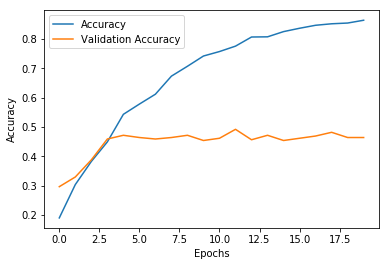

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()